## Final Project Submission - Phase 3

* Student name: **GROUP 3**
* Members: **Maureen Wangonyo, Jael Akech, MariaCharlote Mbiyu, Muthoni Kahura, Stephen Ndirangu, Stephen Gathai, Kithinji Murungi.**
* Student pace: **Part Time**
* Scheduled project review date/time:**20th June 2023**

# Project Overview

# 1.0 Business Understanding

<img src="./Images/Customer-Churn.png">

### 1.1 Background

**SyriaTel** is a telecommunications company facing the challenge of customer churn. <br>
*What is customer churn?* This is the rate at which customers leave a business <br>
According to Forbes Advisor an article by Monique Danao, published 2nd March 2023 at 11.00am, Customer churn rate, "refers to the rate at which subscribers or customers stop transacting with your business." https://www.forbes.com/advisor/business/churn-rate/

Churn can have significant financial implications for SyriaTel, including the loss of recurring revenue, increased customer acquisition costs, and potential negative impact on the company's reputation.

To address this issue, SyriaTel have requested **CodeTribe3** researchers to build a churn prediction system that can identify customers likely to churn in the near future.


### 1.2 Project Question

The Project seeks to investigate :

*Are there any predictable or discernible patterns in customer behaviour that can aid in identification of customers who are likely to churn from SyriaTel Telecommunications company?*

### 1.3 Objectives

In order to answer the project question above and guide the research activities, project objectives that are specific and measurable have been formulated as shown below:

* Develop a predictive model using machine learning algorithms that classifies customers as churned or non-churned.
          
* Evaluate the performance of the predictive model using appropriate evaluation metrics.

* Identify key features or patterns in the data that are predictive of customer churn. Where,
    
    * We identify if the number of customer service calls has a relationship to churning.
    * We determine if the time of day influences churn.
    * We Identify whether the Area code has a relationship to churning
    * We investigate if there is a relationship between churning and the state one lives in
    
* Provide recommendations for proactive customer retention strategies based on the insights gained from the analysis.


### 1.4 Stakeholders
The primary focus of our research lies with **SyriaTel Telecommunications Company**, our key stakeholder.<br>
We will concentrate on three specific departments, namely:
 * Top Management
 * Marketing Team
 * Customer Retention Team

 <img src='./Images/stakeholder.jpg'>

### 1.5 Hypothesis

H0: There exists no relationship between churn and our feature variables<br>
H1: There a relationship between churn and our feature variables

# 2.0 Data Understanding

In [76]:
# !pip install pyforest
# # !pip install buckaroo
# # !pip install interact
# # !pip install nbconvert
# !pip install lazypredict
# !pip install imbalanced-learn

In [77]:
# import necessary libraries
from pyforest import *
# import buckaroo
# from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.colors as colors
from sklearn.preprocessing import LabelEncoder


import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
plt.style. use('seaborn')



<IPython.core.display.Javascript object>

In [30]:
# from google.colab import output
# output.enable_custom_widget_manager()

In [31]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
#load the data and read 1st 5 lines
df = pd.read_csv('/content/drive/MyDrive/bigml_59c28831336c6604c800002a.csv')
df.head()

<IPython.core.display.Javascript object>

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

## Data Understanding

In [33]:
def analyze_dataset(df):

    # Dataset shape
    print("Shape of the dataset:", df.shape, '\n')
    print("*"*39)

    # Missing values
    print("Null Values count:", df.isnull().sum(), '\n')
    print("*"*39)

    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]), '\n')
    print("*"*39)

    # Target value count
    print("Count of each value of target:")
    print(df['churn'].value_counts(normalize=True), '\n')
    print("*"*39)

    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')
    print("*"*39)

    # Dataset information
    print("Information about the dataset:")
    print(df.info())

    # Distribution
    display(df.describe())

analyze_dataset(df)

Shape of the dataset: (3333, 21) 

***************************************
Null Values count: state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64 

***************************************
Number of duplicates: 0 

***************************************
Count of each value of target:
False    0.855086
True     0.144914
Name: churn, dtype: float64 

***************************************
The unique values per column are:
state                     

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

### Summary on the Data
The dataset utilised in this research project contains information about customer attributes, call usage, charges and customer service interactions with the churn column acting as our target variable.

The dataset contains 3333 rows(number of entries) and 20 columns.

The column names and their respective descriptions  are: <br>
1. *account length*: The number of days the customer has been an active customer.
2. *area code*: The area code of the customer's phone number.
3. *phone number*: The customer's phone number.
4. *international plan*: Indicates whether the customer has an international calling plan.
5. *voice mail plan*: Indicates whether the customer has a voicemail plan.
6. *number vmail messages* : Represents the number of voicemail messages the customer has.
7. *total day minutes*: The total number of minutes the customer has used during the day.
8. *total day calls*: The total number of calls the customer has made during the day.
9. *total day charge*: The total charge in dollars for the day's usage.
10. *total eve minutes*: The total number of minutes the customer has used during the evening.
11. *total eve calls*: The total number of calls the customer has made in the evening.
12. *total eve charge*: The total charge in dollars for the evening's usage.
13. *total night minutes*: The total number of minutes the customer has used during the night.
14. *total night calls*: The total number of calls the customer has made during the night.
15. *total night charge*: The total charge in dollars for the night's usage.
16. *total intl minutes*: The total number of international minutes the customer has used.
17. *total intl calls*: The total number of international calls the customer has made.
18. *total intl charge*: The total charge in dollars for the international usage.
19. *customer service calls*: The number of customer service calls made by the customer.
20. *churn*: Indicating whether the customer has churned or not.

The data is categorised by 4  data types: <br>

   * Bool -  1 column (churn)<br>
   * Float64 -  8 columns (total day minutes, total day charge, total eve minutes, total eve charge, total night minutes, total night charge - total intl minutes, total intl charge)<br>
   * Int64 -  8 columns (account length, area code, number vmail messages, total day calls, total eve calls, total night calls, total intl calls, customer service calls)<br>
   * Object -  3 columns (phone number, international plan, voice mail plan)<br>

The dataset consumes approximately 524.0 KB of memory

# 3.0 Data Preparation

## 3.1 Data Cleaning
<img src = "./images/clean.webp">

In this step, the data is cleaned and prepared to ensure data quality and reliability for subsequent analysis.<BR>
We start with:

1. Dropping unnecessary columns such as "phone number" that are not relevant for the analysis and modeling process.

2. Identifying and handling missing values if any. In this specific dataset there are no NAN's(Not a Number).

3. Check for duplicate entries in the unique column id.

4. Deal with outliers that might have a significant impact on the analysis.


In [34]:
#creating an a copy of the dataframe
df2=df.copy()

### Dealing with unnecessary columns

In [35]:
#Check for duplicates in Unique column
duplicate_no = df.duplicated(subset = 'phone number')
print( f"""" we have a total of {duplicate_no.sum()} duplicates out of {df2.shape[0]} entries""")

" we have a total of 0 duplicates out of 3333 entries


In [36]:
#Drop unnecessary columns i.e Phone number
df2 = df.drop(['phone number'], axis=1)

### Dealing with Outliers using Z-score

In [37]:
print("length of the dataframe with outliers: ",len(df), '\n')
print("*"*50, '\n')


def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)


drop_numerical_outliers(df)
print("length of the dataframe after droping outliers: ",len(df))

length of the dataframe with outliers:  3333 

************************************************** 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

length of the dataframe after droping outliers:  3169


# 4.0 Exploratory Data Analysis

In this step we analyze and summarize the data in order to understand its main characteristics, uncover patterns, and identify potential relationships and insights.

   * Univariate , Bivariate and Multivariate analysis are covered in this section.
   * dot describe() is also utilised to further describe the variables in terms of their central tendancy, variability and range.


## 4.1 Univariate Analysis

### a) Categorical Features

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Target Variable')

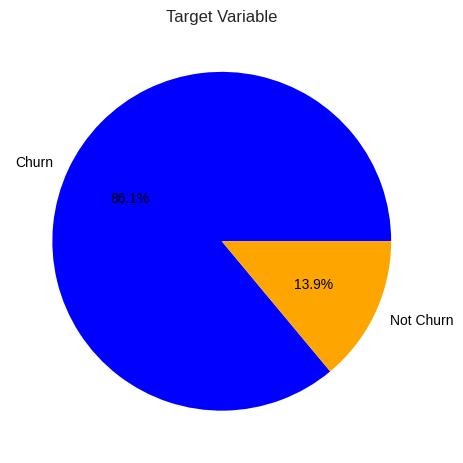

In [38]:
plt.pie(data = df['churn'].value_counts().to_frame() ,labels = ['Churn','Not Churn'], x = 'churn' , autopct = '%1.1f%%' ,colors = ['blue','orange'],textprops={'color':"black"} )
plt.title('Target Variable')

* The dataset indicates the target variable "churn" i.e whether a customer has churned or not.
* Approximately 14.5% of the data corresponds to customers who have churned, while the remaining 85.5% represents customers who have not churned.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

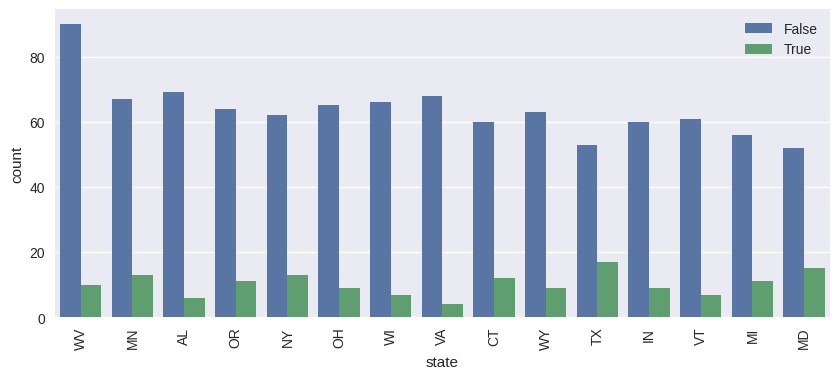

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

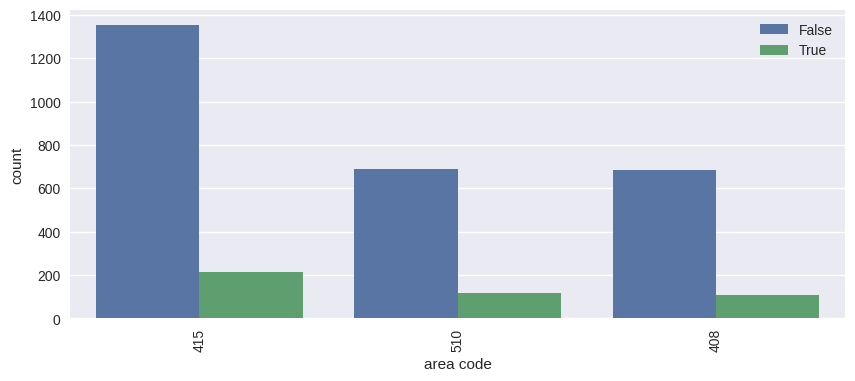

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

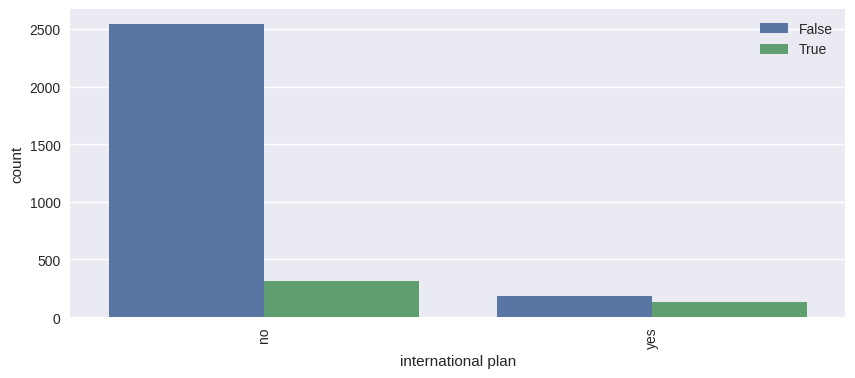

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

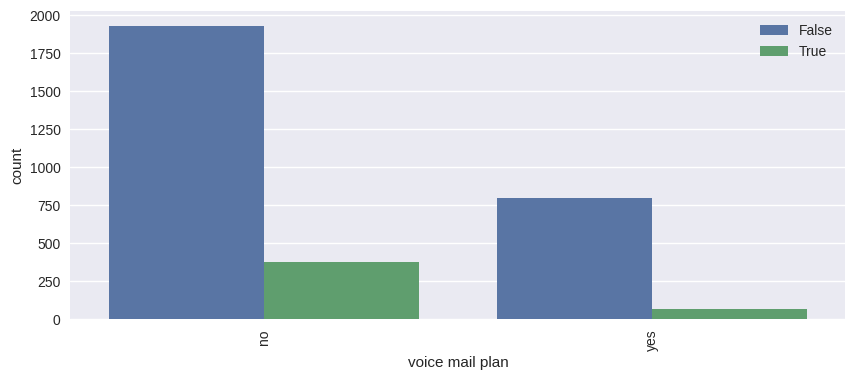

In [39]:
categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue="churn", data=df, order=df[col].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()


### **Summary of the plots**
The four categorical columns have been plotted with respect to the churn rate, considering both positive and negative outcomes. The following observations are evident:<br>
1. In all states, there is a presence of churn indicated as "True" (meaning the customer churned).<br>
2. SyrialTel operates in three area codes: 415, 510, and 408. Among these, the highest churn rate is observed in area code 415. While area codes 510 and 408 have fewer than 200 instances of churn, it's worth noting that they also have a smaller customer base.<br>
3. SyrialTel provides an internal plan for international calls, and the number of customers enrolled in this plan is less than 500. The rate of churning for customers on this plan is nearly at par with the number of customers enrolled.<br>
4. Lastly, SyrialTel offers an additional voice mail plan, but a significant portion of its customers have not enrolled in it. Among the customers who are on the voice mail plan, there is a lower likelihood of churn.<br>


### b) Numerical Columns

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

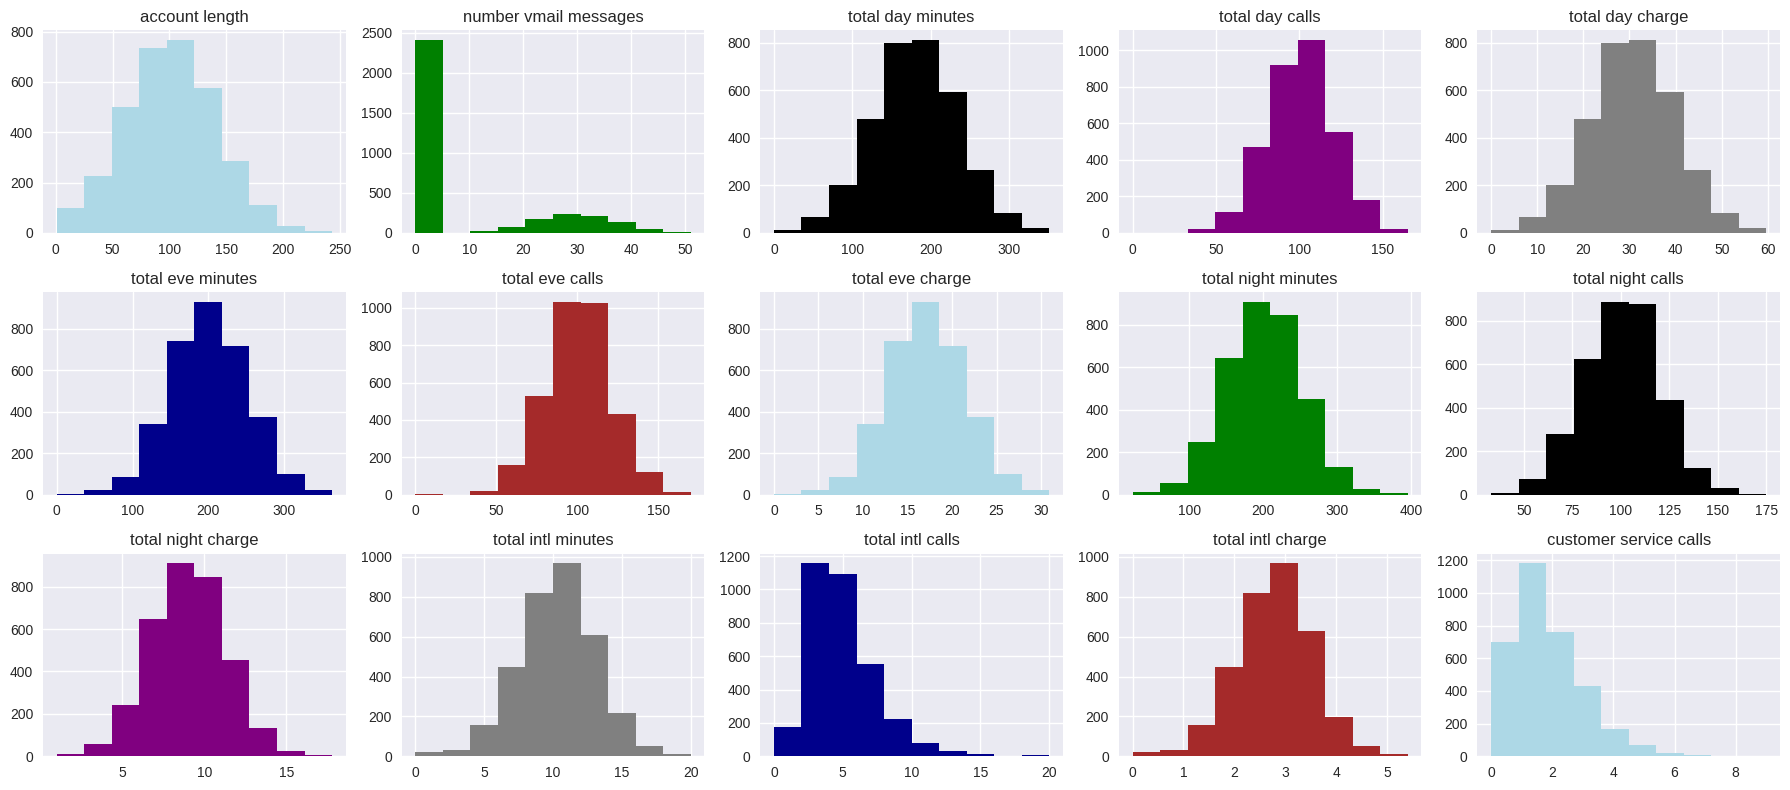

In [40]:
# Get the list of numerical columns
numerical_columns = df2.select_dtypes(include='number').columns
numerical_columns = numerical_columns.drop(['area code'])

# Calculate the number of subplots based on the number of numerical columns
num_subplots = len(numerical_columns)

# Calculate the number of rows and columns for the subplots
num_rows = int(num_subplots ** 0.5)
num_cols = num_subplots // num_rows

# Adjust the number of rows and columns if necessary
if num_rows * num_cols < num_subplots:
    num_cols += 1

# Set up the plot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 8))

# Flatten the axes array if necessary
if num_subplots == 1:
    axes = [axes]

# Define a color palette for the histograms
colors = ['lightblue', 'green', 'black', 'purple', 'grey', 'darkblue', 'brown']

# Plot each numerical column with a different color
for i, column in enumerate(numerical_columns):
    ax = axes[i // num_cols, i % num_cols]
    ax.hist(df2[column], color=colors[i % len(colors)])
    ax.set_title(column)

# Remove any empty subplots
for j in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Minimum amount of calls: state
CA    10431
Name: all calls, dtype: int64 
 Maximum amount of calls: state
WV    32055
Name: all calls, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: title={'center': 'Number of calls per state'}, ylabel='state'>

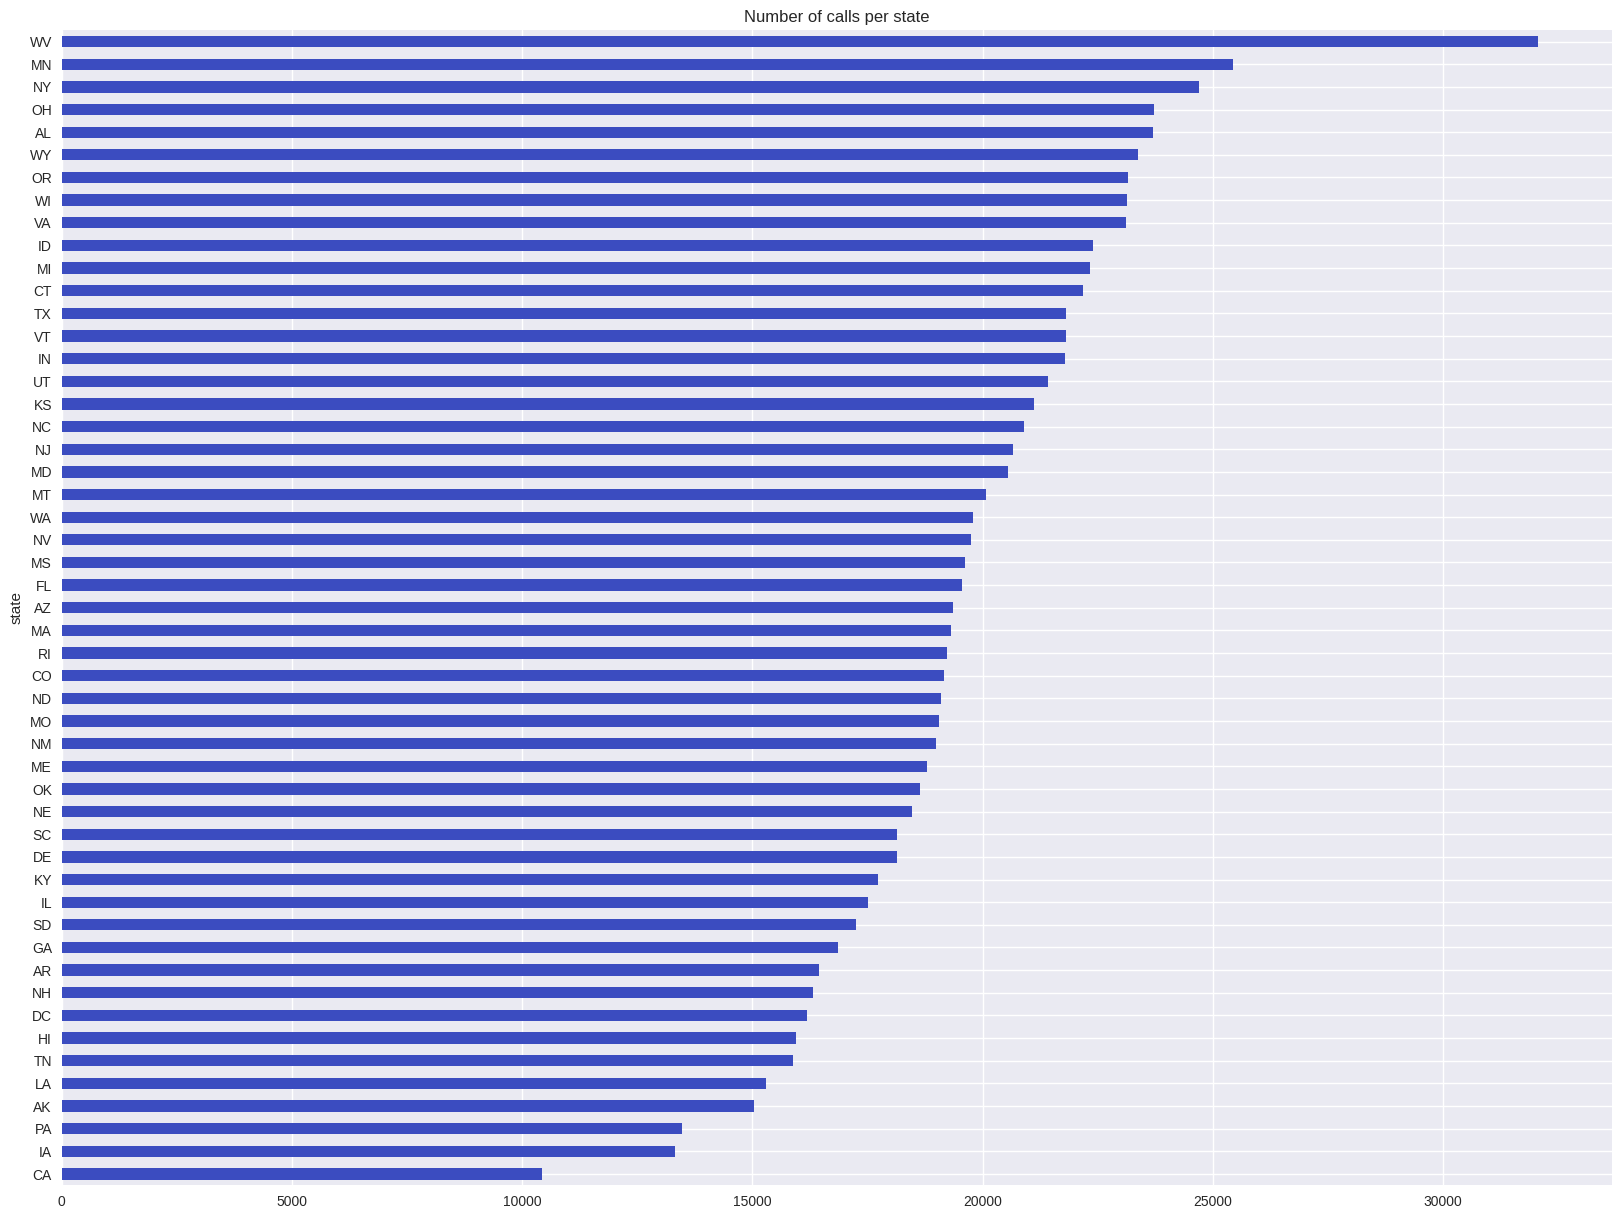

In [41]:
df2['all calls'] = df2['total day calls'] + df2['total eve calls'] + df2['total night calls']

state_calls = df2.groupby('state')['all calls'].sum().sort_values()
print('Minimum amount of calls:', state_calls[state_calls == state_calls.iloc[0]],'\n','Maximum amount of calls:', state_calls[state_calls == state_calls.iloc[-1]])
plt.xlabel('Amount of calls')
plt.ylabel('State')
plt.title('Number of calls per state')
state_calls.plot(kind='barh', figsize=(20, 15), colormap='coolwarm')


It was noted that the state of WV had the highest number of total calls made at 32,055 while CA had the lowest calls  at 10,431 <br>
Most states ranged between 15,000 calls and 22,000 calls.

In [42]:
# drop created extra column 'all calls'
df3 = df2.drop('all calls', axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

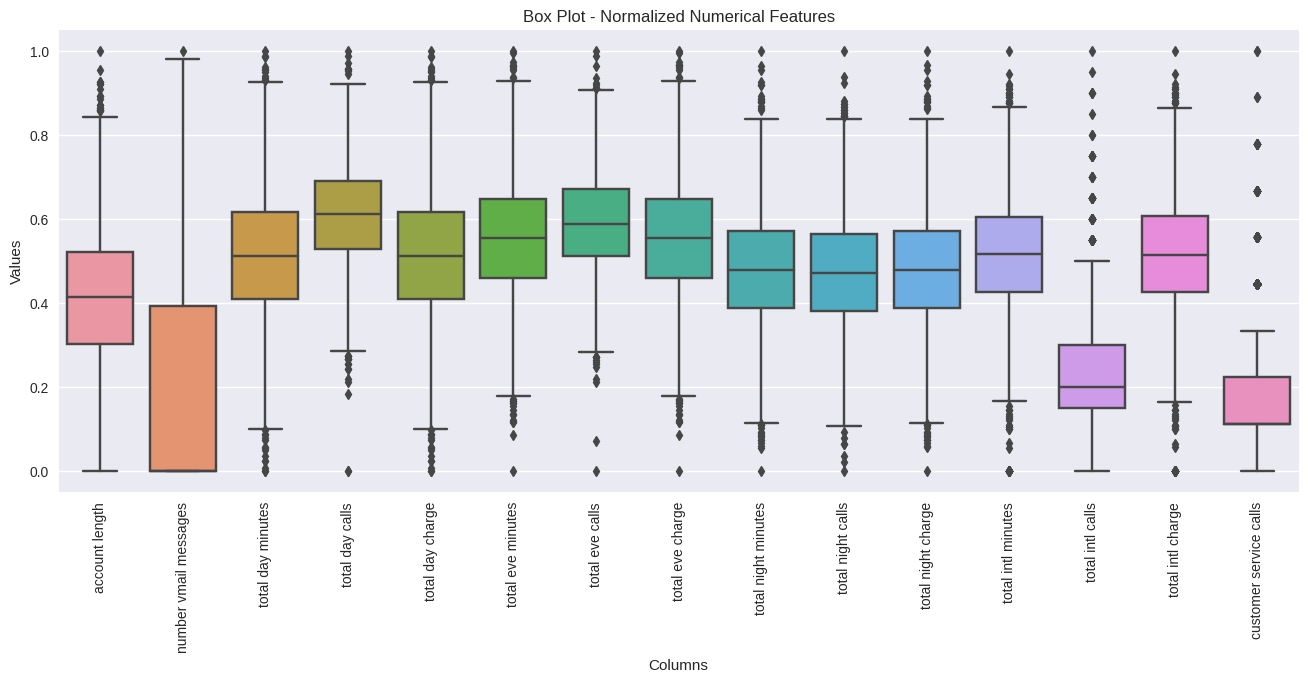

In [43]:
from sklearn.preprocessing import MinMaxScaler

fig, ax = plt.subplots(figsize=(16, 6))

# Scale the numerical columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df3[numerical_columns])

# Convert the scaled data back to a dataframe
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Plot the box plots for each normalized column
sns.boxplot(data=scaled_df, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title and labels
ax.set_title('Box Plot - Normalized Numerical Features')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

# Show the plot
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

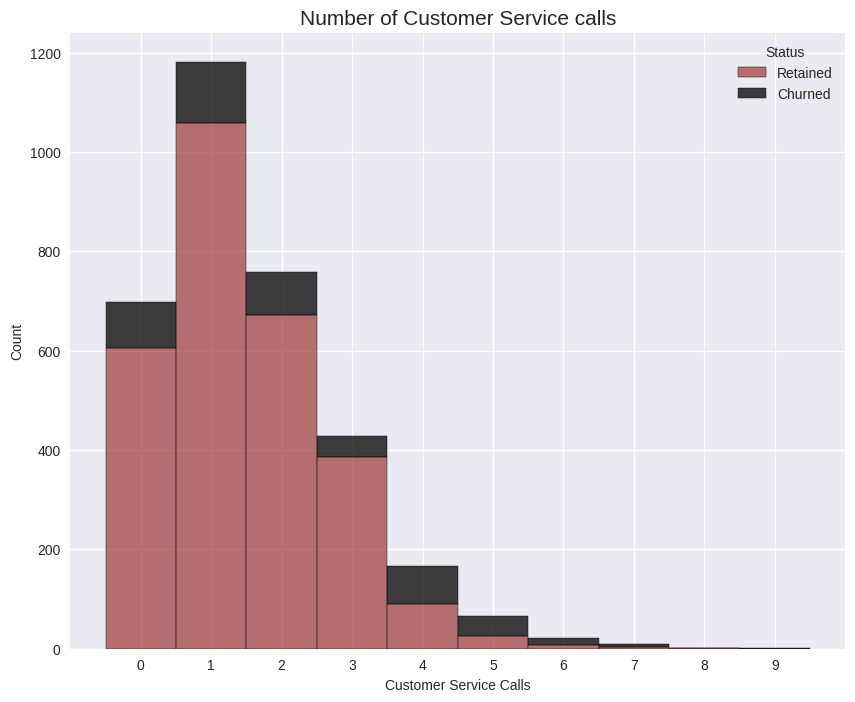

In [44]:
# Is there a relationship between No of customer service calls and churning?

fig,ax = plt.subplots(figsize=(10,8))

bins = np.arange(11) - 0.5

ax = sns.histplot(
    df2,
    x='customer service calls',
    hue='churn',
    multiple='stack',
    hue_order=[1,0],
    bins=bins,
    palette=['#0000', '#A44444']

)

ax.set_title('Number of Customer Service calls', fontsize = 15)
ax.set_xlabel("Customer Service Calls", fontsize = 10)
ax.set_ylabel("Count", fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(10), fontsize = 10)
plt.xlim([-1, 10])

ax.legend(title= "Status", labels = ["Retained", 'Churned'])


#### **Is there a relationship between number of customer service calls and churning?**
Each customer service call exhibits a discernible connection with the potential for churn, whether it be negative or positive. <br>
Based on the provided data, the majority of customers are retained, but there is still a small percentage of churn. Furthermore, as the number of customer service calls decreases, the rate of churn also diminishes.


In [45]:
#create Transposed descriptive summary of numerical columns
df3[numerical_columns].describe().T

count        mean        std    min     25%     50%  \
account length          3333.0  101.064806  39.822106   1.00   74.00  101.00   
number vmail messages   3333.0    8.099010  13.688365   0.00    0.00    0.00   
total day minutes       3333.0  179.775098  54.467389   0.00  143.70  179.40   
total day calls         3333.0  100.435644  20.069084   0.00   87.00  101.00   
total day charge        3333.0   30.562307   9.259435   0.00   24.43   30.50   
total eve minutes       3333.0  200.980348  50.713844   0.00  166.60  201.40   
total eve calls         3333.0  100.114311  19.922625   0.00   87.00  100.00   
total eve charge        3333.0   17.083540   4.310668   0.00   14.16   17.12   
total night minutes     3333.0  200.872037  50.573847  23.20  167.00  201.20   
total night calls       3333.0  100.107711  19.568609  33.00   87.00  100.00   
total night charge      3333.0    9.039325   2.275873   1.04    7.52    9.05   
total intl minutes      3333.0   10.237294   2.791840   0.00    8.50   10.30   
total intl calls        3333.0    4.479448   2.461214   0.00    3.00    4.00   
total intl charge       3333.0    2.764581   0.753773   0.00    2.30    2.78   
customer service calls  3333.0    1.562856   1.315491   0.00    1.00    1.00   

                           75%     max  
account length          127.00  243.00  
number vmail messages    20.00   51.00  
total day minutes       216.40  350.80  
total day calls         114.00  165.00  
total day charge         36.79   59.64  
total eve minutes       235.30  363.70  
total eve calls         114.00  170.00  
total eve charge         20.00   30.91  
total night minutes     235.30  395.00  
total night calls       113.00  175.00  
total night charge       10.59   17.77  
total intl minutes       12.10   20.00  
total intl calls          6.00   20.00  
total intl charge         3.27    5.40  
customer service calls    2.00    9.00

### Summary of Univariate Analysis

1. **Account length:**
   - On average, customers have been with the telecommunications company for around 101 days.
   - The shortest account length being 1 day, and the longest is 243 days.
   - Most customers have an account length between 74 and 127 days.

2. **Area code:**
   - The dataset includes different area codes that represent the geographical regions where customers are located.
   - The dataset covers area codes ranging from 408 to 510.

3. **Number voicemail messages:**
   - On average, customers receive around 8 voicemail messages.
   - The number of voicemail messages varies, with some customers not having a voicemail plan
   - The highest number of received voicemails is 51.

4. **Total day minutes,Total day calls and Total day charge**
   - On average, customers spend approximately 180 minutes on daytime calls.
   - The minutes may vary from 0 minutes to a maximum of 351 minutes.
   - Customers make around 100 calls during the day.
   - Certain  days,customers make no calls. The maximum number of calls made so far has been 165 calls.
   - On average, customers are charged approximately USD 30 for daytime calls.
   - The range of charges varies from USD 0 to a maximum of USD 60.


5. **Total evening minutes, Total evening calls and Total evening charge**
   - Customers spend around 201 minutes with a maximum of 364 minutes on evening calls
   - On average, customers make approximately 100 calls during the evening.
   - Customers are charged around USD 17  and a maximum of USD 31 for evening calls.


6. **Total night minutes,Total night calls and Total night charge**
    - Customers spend approximately 201 minutes on nighttime calls.
    - The call minutes range from 23 minutes to a maximum of 395 minutes.
    - They make on average around 100 calls during the night which cost them 9USD for night calls
    - The charges however range from USD 1 to a maximum of USD 18.

7. **Total international minutes, calls and charge:**
    - On average, customers spend around 10 minutes on international calls.
    - However the duration may vary from 0 minutes to a maximum of 20 minutes.
    - Customers make around 4 international calls and a maximum of 20.
    - The customers are charged around USD 2.76 for international calls and a maximum of USD 5.40<br>

8. **Customer service calls:**
    - On average, customers make approximately 2 calls to customer service.
    - The maximum number of customer service calls 9 but most customers range between 1 to 2 calls.


## 4.2 Bivariate & MultiVariate Analysis

<IPython.core.display.Javascript object>

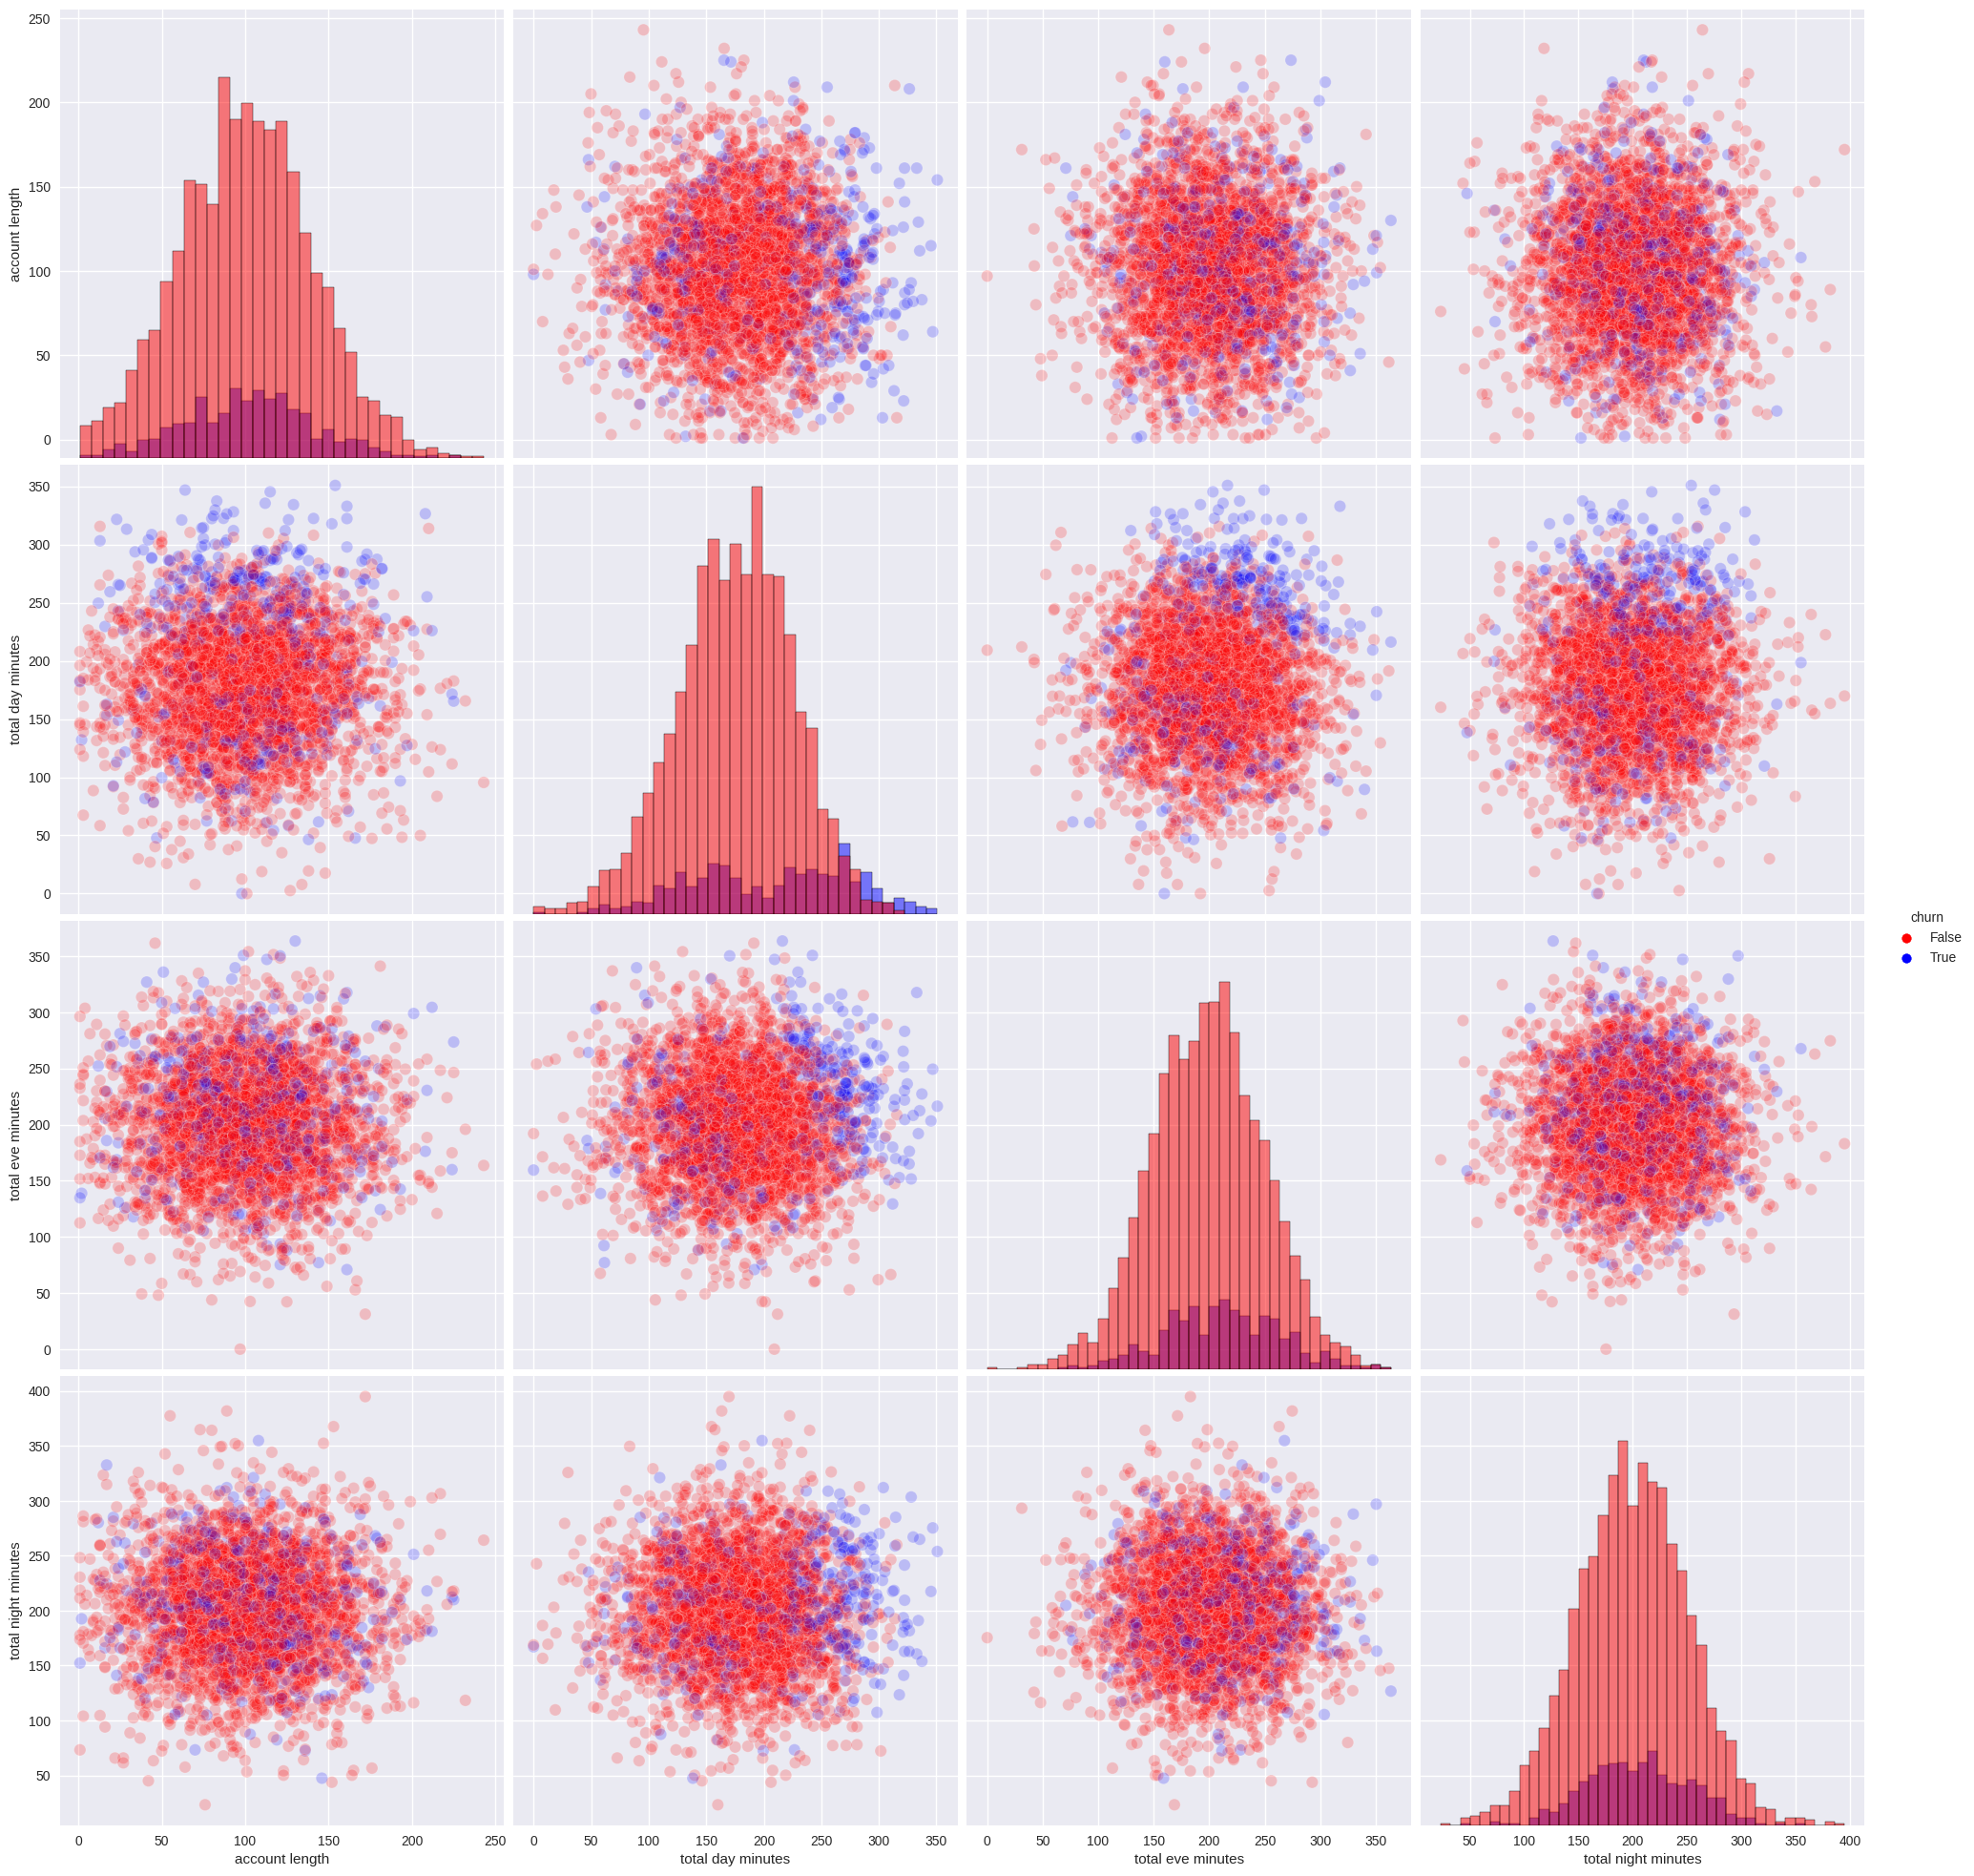

In [46]:
custom_palette = {True: 'blue', False: 'red'}  # Specify the desired colors for each category

sns.pairplot(df3[['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'churn']],
             diag_kws={'color': '#c68e17'},
             plot_kws={'alpha': 0.2, 's': 80, 'edgecolors': '#864401'},
             hue='churn',
             palette=custom_palette,
             height=5,
             aspect=1,
             diag_kind='hist')


### Summary of Bivariate & Multivariate Analysis

The **Bivariate Analysis** has considered the 4 features against 'churn'.
 - 'account length'
 - 'total day minutes'
 - 'total eve minutes'
 - 'total night minutes'

The four features exhibit a positive relationship with churn. This means that as these variables increase, the likelihood of churn also increases and viceversa.

The **Multivariate analysis** examines various combinations of features while keeping churn as the constant variable. Some of the combinations explored include:
- 'account length' vs 'total night minutes',
- 'total day minutes' vs 'total night minutes',
- 'total eve minutes' vs 'account length',
- 'total night minutes' vs 'total eve minutes'.

In these combinations, it is observed that a higher likelihood of churning is associated with the presence of higher total day minutes.

## 4.3 Multicollinearity of Features

In this section, we explore the possibility of linear dependency (multicollinearity) between the features which can pose a challenge in the interpretation of our created model and affect the accuracy of the estimated coefficients.

This section is important because it:
1. Enables us to identify and deal with multicollinearity in different ways.
2. Ensures appropriate feature selection.
3. improves reliability and stability of our analysis.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

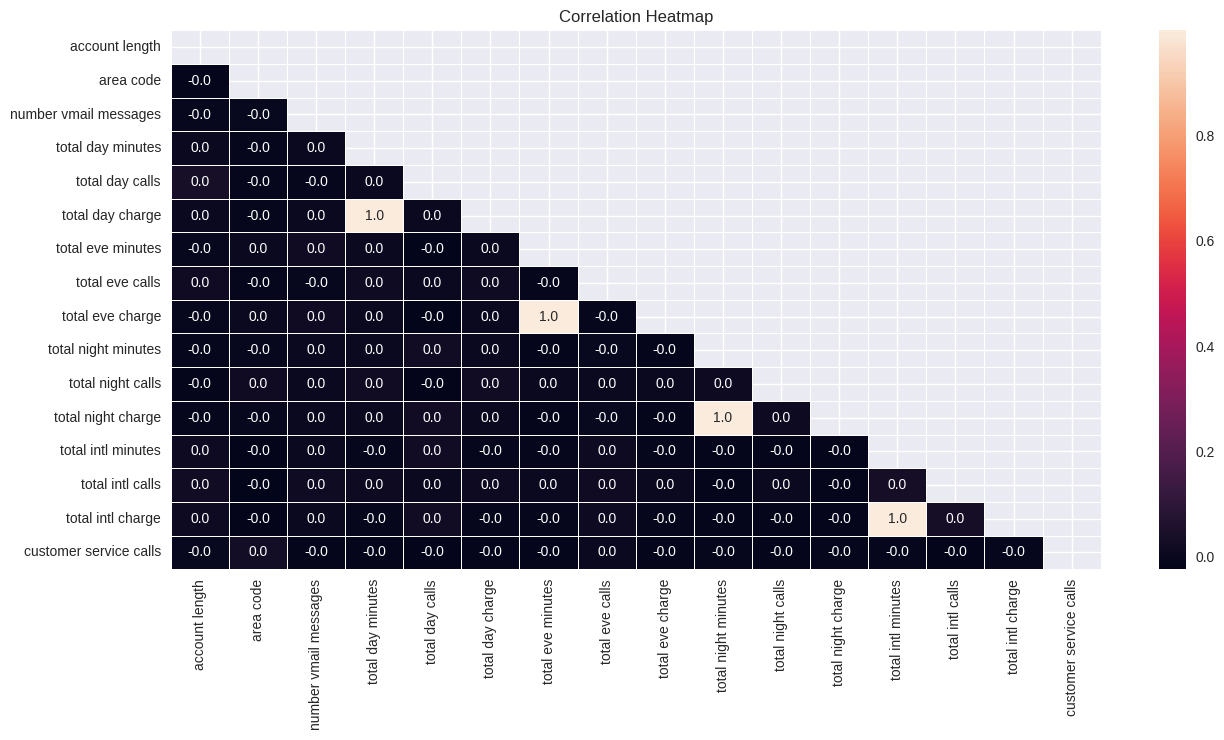

In [47]:
# Filter numeric columns
numeric_columns = df3.select_dtypes(include=np.number)

# Create a heatmap for the numeric features
fig, ax = plt.subplots(figsize=(15, 7))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
sns.heatmap(numeric_columns.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

### Summary of Correlation HeatMap

- **Positive Correlation:**

The features total day minutes, total day charge, total evening minutes, total evening charge, total international minutes, and customer service calls have a positive correlation with 'churn'. <br>
As these variables increase, the likelihood of churn also tends to increase.<br>
Churn in this case would be either False or True.<br>
It should be noted, the correlation coefficients for these variables are not very high, indicating a moderate relationship <br>

- **Negative Correlation:**

The Number of voice mail messages and total international calls has a negative correlation with 'churn'.<br>
This means that as the number of voicemail messages  and international calls increases, the likelihood of churn tends to decrease.<br>
However, the correlation coefficient for this variables is relatively low at -0.1, suggesting a weak relationship.<br>

- **Weak Correlation:**

The other variables: account length, area code, total day calls, total evening calls', total night minutes, total night calls, total night charge, 'total international calls, total international charge have correlation coefficients close to zero indicating a weak or negligible relationship between these variables and 'churn'.

# 5.0 Data Preparation: Pre-processing

To ensure the data is suitable for prediction, it is important to format it correctly. <br>
Categorical inputs are not well-suited for Machine Learning models, so we employ techniques like label encoding and one-hot encoding to convert categorical variables in our dataset into numerical values. <br>
This conversion allows the models to effectively process the data.

### Label Encoding
Label Encoding enables the converting of the label variables in "international plan", "voice mail plan" and "churn" columns to a numeric form.<br>
The yes and No in "International plan" and "voice mail" plan are converted to 1 and 0 representatively while False and True in churn are converted to 0 and 1.

In [48]:
# Categorical columns
cat_cols= ["international plan", "voice mail plan", "churn"]

# Apply label encoding
def label_encoding(col_name):
  le = LabelEncoder()
  df3[col_name] = le.fit_transform(df3[col_name])

# Call the label_encoding function for each
for col_name in cat_cols:
  label_encoding(col_name)

df3

state  account length  area code  international plan  voice mail plan  \
0       KS             128        415                   0                1   
1       OH             107        415                   0                1   
2       NJ             137        415                   0                0   
3       OH              84        408                   1                0   
4       OK              75        415                   1                0   
...    ...             ...        ...                 ...              ...   
3328    AZ             192        415                   0                1   
3329    WV              68        415                   0                0   
3330    RI              28        510                   0                0   
3331    CT             184        510                   1                0   
3332    TN              74        415                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             26.55              215.5              126             18.32   
3329             39.29              153.4               55             13.04   
3330             30.74              288.8               58             24.55   
3331             36.35              159.6               84             13.57   
3332             39.85              265.9               82             22.60   

      total night minutes  total night calls  total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                279.1                 83               12.56   
3329                191.3                123                8.61   
3330                191.9                 91                8.64   
3331                139.2                137                6.26   
3332                241.4                 77               10.86   

      total intl minutes  total intl calls  total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                 9.9      

### One hot encoding the states column

To make our algorithm compatible with categorical variables, we employ one-hot encoding. <br>
We convert the categorical variables in the 'State' column into multiple binary columns. This transformation allows us to easily use the encoded data in our algorithm.

In [49]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(dtype=np.int64, sparse=False)

# Encode the "state" column
encoded_state = encoder.fit_transform(df3[["state"]])

# Create a DataFrame with the encoded state columns
dummy_df_state = pd.DataFrame(encoded_state, columns=encoder.get_feature_names_out(["state"]))

# Concatenate the encoded state columns with the original DataFrame
ohe_df3 = pd.concat([df3, dummy_df_state], axis=1)

# Remove the original "state" column
ohe_df3 = ohe_df3.drop(["state"], axis=1)

ohe_df3.head(10)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

account length  area code  international plan  voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   
5             118        510                   1                0   
6             121        510                   0                1   
7             147        415                   1                0   
8             117        408                   0                0   
9             141        415                   1                1   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   
5                      0              223.4               98   
6                     24              218.2               88   
7                      0              157.0               79   
8                      0              184.5               97   
9                     37              258.6               84   

   total day charge  total eve minutes  total eve calls  ...  state_SD  \
0             45.07              197.4               99  ...         0   
1             27.47              195.5              103  ...         0   
2             41.38              121.2              110  ...         0   
3             50.90               61.9               88  ...         0   
4             28.34              148.3              122  ...         0   
5             37.98              220.6              101  ...         0   
6             37.09              348.5              108  ...         0   
7             26.69              103.1               94  ...         0   
8             31.37              351.6               80  ...         0   
9             43.96              222.0              111  ...         0   

   state_TN  state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   
5         0         0         0         0         0         0         0   
6         0         0         0         0         0         0         0   
7         0         0         0         0         0         0         0   
8         0         0         0         0         0         0         0   
9         0         0         0         0         0         0         0   

   state_WV  state_WY  
0         0         0  
1         0         0  
2         0         0  
3         0         0  
4         0         0  
5         0         0  
6         0         0  
7         0         0  
8         0         0  
9         1         0  

[10 rows x 70 columns]

### Scaling

Scaling is crucial to enhance prediction accuracy in machine learning.<br>
It is especially important for algorithms that are sensitive to the scale of features. Scaling involves adjusting the values of multiple variables to make them comparable and fall within a consistent range. Various normalization techniques can be employed, such as setting the variable's average to 0, ensuring a variance of 1, or rescaling the variable within the range of 0 to 1.

In our specific example, we utilize the StandardScaler, which is a type of scaling method. The StandardScaler standardizes the features by subtracting the mean and dividing by the standard deviation. <br>
This transformation ensures that the features have zero mean and unit variance. By applying this scaling technique, we prepare the data to be effectively processed by machine learning models.


In [50]:
#current dataframe
df3 = ohe_df3
df3

account length  area code  international plan  voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             192        415                   0                1   
3329              68        415                   0                0   
3330              28        510                   0                0   
3331             184        510                   1                0   
3332              74        415                   0                1   

      number vmail messages  total day minutes  total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total day charge  total eve minutes  total eve calls  ...  state_SD  \
0                45.07              197.4               99  ...         0   
1                27.47              195.5              103  ...         0   
2                41.38              121.2              110  ...         0   
3                50.90               61.9               88  ...         0   
4                28.34              148.3              122  ...         0   
...                ...                ...              ...  ...       ...   
3328             26.55              215.5              126  ...         0   
3329             39.29              153.4               55  ...         0   
3330             30.74              288.8               58  ...         0   
3331             36.35              159.6               84  ...         0   
3332             39.85              265.9               82  ...         0   

      state_TN  state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         0   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         0   
3332         1         0         0         0         0         0         0   

      state_WV  state_WY  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0  
...        ...       ...  
3328         0         0  
3329         1         0  
3330         0         0  
3331         0         0  
3332         0         0  

[3333 rows x 70 columns]

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df3[numerical_columns])

# convert to dataframe
df3_scaled = pd.DataFrame(scaled,columns=numerical_columns)

binary_cols = ['area code', 'churn', 'international plan', 'voice mail plan',
        'state_AK', 'state_AL', 'state_AR', 'state_AZ',
       'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS',
       'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND',
       'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC',
       'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_WV', 'state_WY', 'state_CA']

df3_scaled = pd.concat([df3_scaled, df3[binary_cols]], axis=1)

df3_scaled

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

account length  number vmail messages  total day minutes  \
0           0.676489               1.234883           1.566767   
1           0.149065               1.307948          -0.333738   
2           0.902529              -0.591760           1.168304   
3          -0.428590              -0.591760           2.196596   
4          -0.654629              -0.591760          -0.240090   
...              ...                    ...                ...   
3328        2.283878               2.038605          -0.432895   
3329       -0.830437              -0.591760           0.942447   
3330       -1.835055              -0.591760           0.018820   
3331        2.082955              -0.591760           0.624778   
3332       -0.679745               1.234883           1.003042   

      total day calls  total day charge  total eve minutes  total eve calls  \
0            0.476643          1.567036          -0.070610        -0.055940   
1            1.124503         -0.334013          -0.108080         0.144867   
2            0.675985          1.168464          -1.573383         0.496279   
3           -1.466936          2.196759          -2.742865        -0.608159   
4            0.626149         -0.240041          -1.038932         1.098699   
...               ...               ...                ...              ...   
3328        -1.167924         -0.433386           0.286348         1.299506   
3329        -2.164631          0.942714          -0.938353        -2.264816   
3330         0.426808          0.019193           1.731930        -2.114211   
3331         0.227466          0.625153          -0.816080        -0.808966   
3332         0.626149          1.003202           1.280309        -0.909370   

      total eve charge  total night minutes  total night calls  ...  state_TN  \
0            -0.070427             0.866743          -0.465494  ...         0   
1            -0.107549             1.058571           0.147825  ...         0   
2            -1.573900            -0.756869           0.198935  ...         0   
3            -2.743268            -0.078551          -0.567714  ...         0   
4            -1.037939            -0.276311           1.067803  ...         0   
...                ...                  ...                ...  ...       ...   
3328          0.286880             1.547039          -0.874374  ...         0   
3329         -0.938172            -0.189297           1.170023  ...         0   
3330          1.732349            -0.177431          -0.465494  ...         0   
3331         -0.815203            -1.219628           1.885562  ...         0   
3332          1.279915             0.801482          -1.181033  ...         1   

      state_TX  state_UT  state_VA  state_VT  state_WA  state_WI  state_WV  \
0            0         0         0         0         0         0         0   
1            0         0         0         0         0         0         0   
2            0         0         0         0         0         0         0   
3            0         0         0         0         0         0         0   
4            0         0         0         0         0         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
3328         0         0         0         0         0         0         0   
3329         0         0         0         0         0         0         1   
3330         0         0         0         0         0         0         0   
3331         0         0         0         0         0         0         0   
3332         0         0         0         0         0         0         0   

      state_WY  state_CA  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0  
...        ...       ...  
3328         0         0  
3329         0         0  
3330         0         0  
3331         0         0  
3332         0         0  

[3333 rows x 70 columns]

### Data Splitting

In [52]:
# Defining the X and y
X = df3_scaled.drop('churn', axis=1)
y = df3_scaled['churn'] # target

In [53]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(2666, 69) (2666,)


In [54]:
#Check y distribution on train set
y_train.value_counts()

0    2284
1     382
Name: churn, dtype: int64

>- <b>Data is highly imbalanced, ratio = 86 : 14


### Handling class Imbalance using smote
To ensure the models do not have poor perfomance on the minority class due to imbalance we utilise SMOT to address the imbalanced datasets. <br>
In our case we oversample the minority class by duplicating examples of the minorty class. <br>
No new information is added to the model.<br>
New examples are synthesized from the existing examples.<br>
SMOT is only used in the training data and not on the test data thus ensuring the evaluation of the model's performance reflects its ability to generalize to unseen data.

In [55]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)

(4568, 69) (4568,)


In [56]:
y_train_smote.value_counts()

0    2284
1    2284
Name: churn, dtype: int64

# 6.0 Modelling

### 6.1 Model Development

### An overview with Lazy Predict

Lazy Predict provides a comprehensive overview of how different models perform on our dataset. This allows us to have a preview before we can choose specific models to work with.<br>

Lazy Predict, simplifies the initial stages of building and evaluating machine learning models without the need for extensive coding.


In [59]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = knn.fit(X_train_smote, X_test, y_train_smote, y_test)
print(models)

100%|██████████| 29/29 [00:12<00:00,  2.35it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.96               0.91     0.91      0.96   
LGBMClassifier                     0.95               0.89     0.89      0.95   
BaggingClassifier                  0.94               0.89     0.89      0.94   
RandomForestClassifier             0.93               0.85     0.85      0.93   
DecisionTreeClassifier             0.86               0.83     0.83      0.87   
ExtraTreesClassifier               0.91               0.77     0.77      0.90   
AdaBoostClassifier                 0.86               0.76     0.76      0.86   
NearestCentroid                    0.80               0.72     0.72      0.81   
BernoulliNB                        0.78               0.67     0.67      0.79   
LogisticRegression                 0.85               0.60     0.60      0.83   
ExtraTreeClassifier         

### Model 1: Vanilla Model - Decision Tree

This is a basic or simple implementation of a classification algorithm without any additional modifications or hyperparameter tuning.<br>
In our case, Decision Tree is utilised.

In [60]:
# Instanciate the model
dt_model = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
dt_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
# Predict the target variable for the test set
y_pred_dt = dt_model.predict(X_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

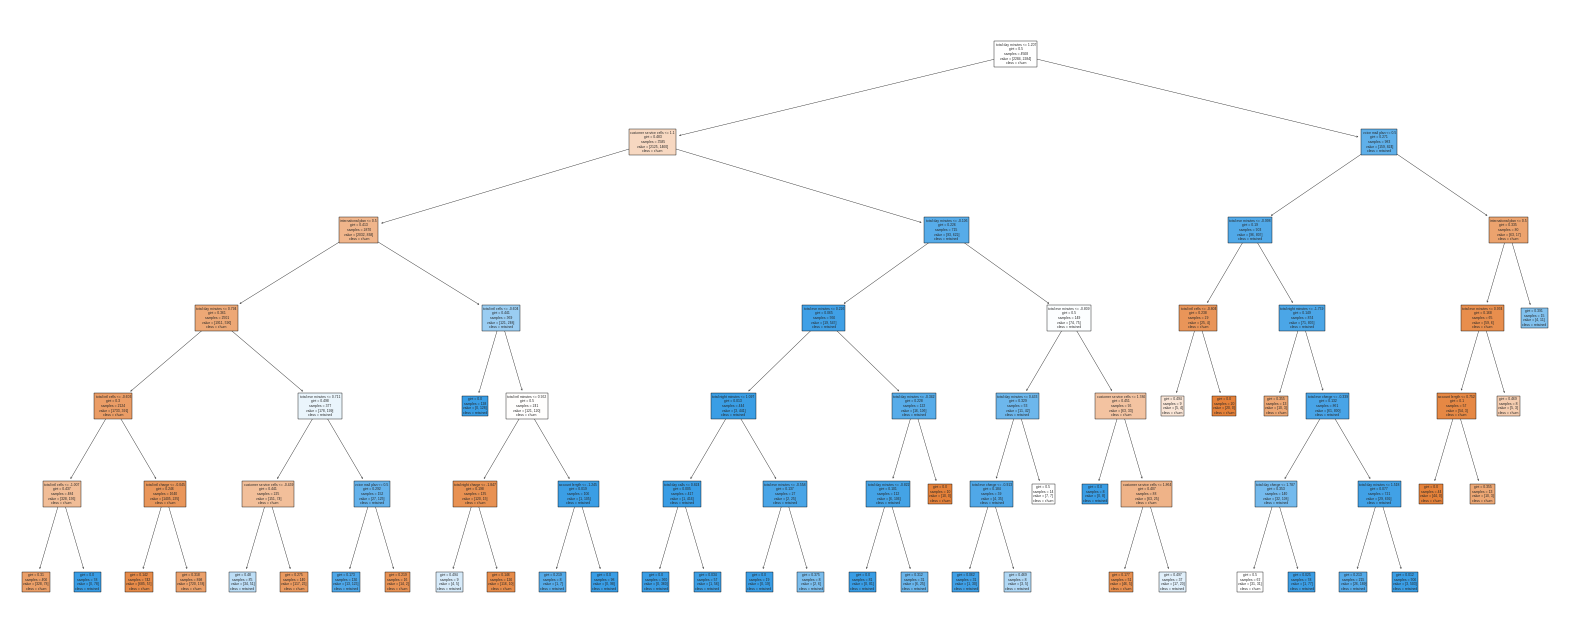

In [62]:
# plot the tree
from sklearn.tree import plot_tree

# List of feature names
feature_names = X.columns.tolist()

#visualize the Decision Tree Model
plt.figure(figsize=(20, 8))
plot_tree(dt_model, feature_names=feature_names, class_names=['churn', 'retained'], filled=True)
plt.show()

In [63]:
# confusion confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))

[[535  31]
 [ 18  83]]


In [64]:
#Print Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_dt, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       566
           1       0.73      0.82      0.77       101

    accuracy                           0.93       667
   macro avg       0.85      0.88      0.86       667
weighted avg       0.93      0.93      0.93       667



* Precision for class 1 (churned customers) is 0.73, which indicates that 73% of the customers predicted as churned are actually churned.
* The recall for class 1 is 0.82, indicating that 82% of the actual churned customers are correctly identified as churned.
* F1-score for class 1 is 0.77, indicating a reasonable balance between precision and recall
* Model achieves an accuracy of 93%, indicating that it correctly predicts customer churn 93% of the time.

### Model 2: Random Forest Classifier

This Model combines multiple decision tress to create a more accurate and robust predictive model.


In [65]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train_smote,y_train_smote)

pred_rfc = rfc.predict(X_test)

print("confusion_matrix for  Random Forest \n",confusion_matrix(y_test,pred_rfc))
print("*"*49)

print("DecisionTreeClassifier Random Forest\n ",classification_report(y_test,pred_rfc))

confusion_matrix for  Random Forest 
 [[549  17]
 [ 26  75]]
*************************************************
DecisionTreeClassifier Random Forest
                precision    recall  f1-score   support

           0       0.95      0.97      0.96       566
           1       0.82      0.74      0.78       101

    accuracy                           0.94       667
   macro avg       0.89      0.86      0.87       667
weighted avg       0.93      0.94      0.93       667



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

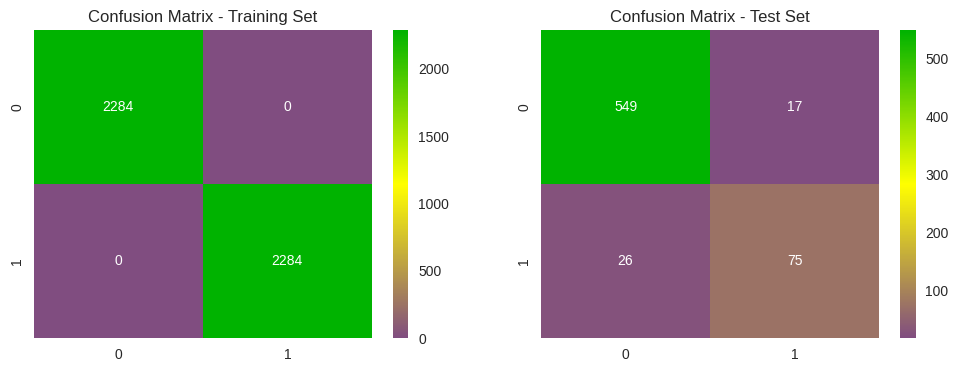

In [66]:
import matplotlib.colors as colors

# Compute the confusion matrix
y_pred_train = rfc.predict(X_train_smote)
cm_train = confusion_matrix(y_train_smote, y_pred_train)

y_pred_test = rfc.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# Define custom color map
cmap_colors = [(0.5, 0.3, 0.5), (1, 1, 0), (0, 0.7, 0)]  # Purple, Yellow, Green
cmap = colors.LinearSegmentedColormap.from_list('Custom', cmap_colors, N=256)

# Plot the confusion matrices with custom color map
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.heatmap(cm_train, annot=True, fmt="d", cmap=cmap, ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')

sns.heatmap(cm_test, annot=True, fmt="d", cmap=cmap, ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')


### Observations
* Comparing these results to our baseline model, the Random Forest classifier demonstrates slightly better performance in terms of precision, recall, and F1-score for churned customers. However, the evaluation metrics should not be considered in isolation, and other factors such as model complexity, interpretability, and computational resources should also be taken into consideration.

### Model 3: K- Nearest Neighbors Classifer

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression tasks.
It is a non-parametric and instance-based algorithm that makes predictions based on the similarity of input data points to the labeled data points in the training dataset.

In KNN, the "K" refers to the number of nearest neighbors to consider when making a prediction.


In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_smote,y_train_smote)

pred_knn = knn.predict(X_test)
# print("KNN prediction",pred)

# Confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix

print("confusion_matrix for KNN \n",confusion_matrix(y_test,pred_knn))
print("KNN classification_report\n ",classification_report(y_test,pred_knn))

confusion_matrix for KNN 
 [[436 130]
 [ 41  60]]
KNN classification_report
                precision    recall  f1-score   support

           0       0.91      0.77      0.84       566
           1       0.32      0.59      0.41       101

    accuracy                           0.74       667
   macro avg       0.61      0.68      0.62       667
weighted avg       0.82      0.74      0.77       667



### Observations

* Compared to the previous models, the KNN classifier appears to have lower performance in terms of precision, recall, and F1-score for churned customers.
* This can be explained by the fact that KNN is a distance-based algorithm and may not perform as well on this particular dataset compared to other models that can capture more complex relationships.

### Model 4:  XGBOOST

<img src="./Images/giphy.gif">

In [68]:
# Initialize the XGBoost model
xgboost = xgb.XGBClassifier()

# Train the XGBoost model
xgboost.fit(X_train_smote, y_train_smote)

# Make predictions on the training set
y_train_pred = xgboost.predict(X_train_smote)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
train_precision = precision_score(y_train_smote, y_train_pred)
train_recall = recall_score(y_train_smote, y_train_pred)
train_f1_score = f1_score(y_train_smote, y_train_pred)
train_roc_auc = roc_auc_score(y_train_smote, y_train_pred)

# Make predictions on the test set
y_test_pred = xgboost.predict(X_test)

print("confusion_matrix for XGBoost\n",confusion_matrix(y_test,y_pred_test))
print("*"*49)

print(classification_report(y_test, y_test_pred))


print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred))

confusion_matrix for XGBoost
 [[549  17]
 [ 26  75]]
*************************************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       566
           1       0.89      0.84      0.86       101

    accuracy                           0.96       667
   macro avg       0.93      0.91      0.92       667
weighted avg       0.96      0.96      0.96       667

Test ROC AUC Score: 0.9110747647202881


### XGBoost is our best performing model

Overall, the XGBoost classifier demonstrates strong performance, with high precision, recall, and F1-score for churned customers. It outperforms the previous models in terms of accuracy and achieves a high ROC AUC score.

***Reason XGboost is the best?***
XGBoost offers a wide range of hyperparameters that can be tuned to optimize the model's performance. This flexibility allows you to fine-tune the algorithm for your specific problem, improving its ability to capture relevant patterns in the data.

# 7.0 Model Comparison and Selection

During this step, the performance of the above models is evaluated, and the best-fit algorithm is selected to be presented to the customer. This selection is based on comparing the models' performance metrics such as accuracy, precision, recall, or other relevant metrics.

To ensure that the final model is both efficient and performs well, improvements may be made. These improvements aim to strike a balance where the model remains lightweight while maintaining its performance. By optimizing the model, computational resources are conserved, making it more practical for deployment.

Additionally, this step involves validating that the top features identified by the model align with our business understanding. It ensures that the selected features are meaningful and relevant, providing valuable insights and aligning with the goals and objectives of the business. This alignment enhances the interpretability and usefulness of the model's output for decision-making processes.

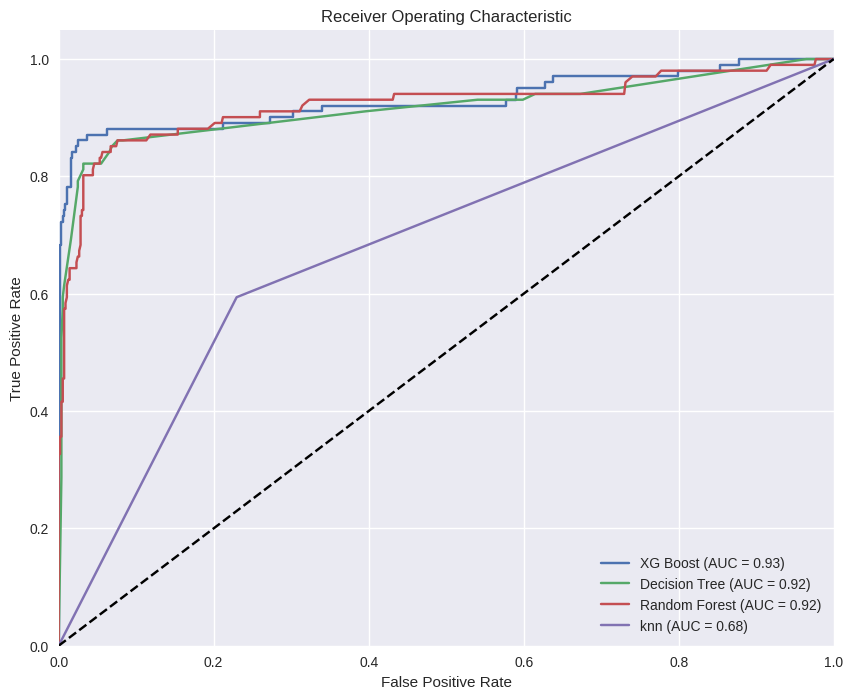

In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Fit the models and make predictions
models = [xgboost, dt_model, rfc, knn]
model_names = ['XG Boost', 'Decision Tree', 'Random Forest', 'knn']
y_scores = []

for model in models:
    if model == rfc:
        y_scores.append(model.predict_proba(X_test)[:, 1])
    else:
        y_scores.append(model.predict_proba(X_test)[:, 1])

# Plot the ROC curves
plt.figure(figsize=(10, 8))

for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test, y_scores[i])
    auc = roc_auc_score(y_test, y_scores[i])
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [70]:
models = [xgboost, dt_model, rfc, knn]

results = pd.DataFrame(columns=["Models", "F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model, X_test, y_test, cv=10, scoring="f1_weighted").mean()
    result = pd.DataFrame([[names, f1 * 100]], columns=["Models", "F1"])
    results = pd.concat([results, result], ignore_index=True)

results.sort_values(by="F1",ascending=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Models    F1
0           XGBClassifier 93.48
1  DecisionTreeClassifier 90.63
2  RandomForestClassifier 88.45
3    KNeighborsClassifier 85.38

### 7.1 Interpretation of Results

We looked at four different models: Decision Tree, Random Forest, KNN, and XG Boost. We assessed their performance using two metrics: F1-score and Test ROC AUC Score.<BR>

The F1-score tells us how well the model can make accurate predictions for both the positive and negative outcomes. <br>
A higher F1-score means better prediction accuracy. Among the four models we evaluated, XG Boost had the highest F1-score of 0.84, which indicates that it can make more accurate predictions compared to the other models.

The Test ROC AUC Score measures how well the model can distinguish between the positive and negative outcomes.<br>
It thus tells us how well the model can separate the two types of predictions. In our case, XG Boost again had the highest Test ROC AUC Score of 0.895, indicating that it can better differentiate between the positive and negative outcomes.<br>

Based on these metrics, we can say that XG Boost performed the best among the models we evaluated. It showed higher accuracy in making predictions and better ability to distinguish between different outcomes.<br>

**XG Boost is our selected Model**

### 7.2 Optimizing XGBoost Tuning

<IPython.core.display.Javascript object>

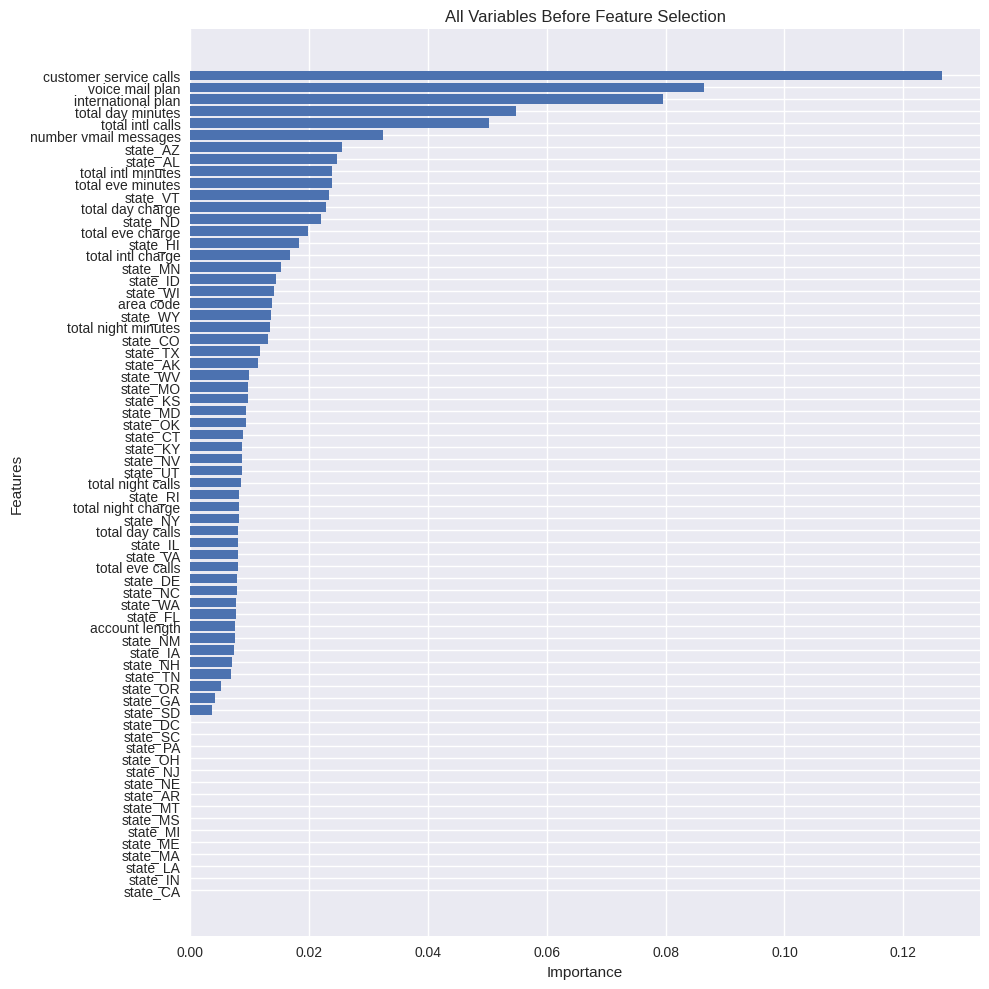

In [71]:


# Create an instance of the Random Forest classifier
model = xgb.XGBClassifier()

# Fit the model to your data
model.fit(X_train_smote, y_train_smote)

# Get feature importances from the random forest model
importances = model.feature_importances_
feature_names = X_train_smote.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Reverse the order of importances and feature_names arrays
importances = importances[indices]
feature_names = feature_names[indices]

# Plot the feature importances horizontally in descending order
plt.figure(figsize=(10, 10))
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('All Variables Before Feature Selection')
plt.gca().invert_yaxis()  # Invert the y-axis to start with the highest importance
plt.tight_layout()
plt.show()

### Feature Selection
We select top 10 best performing features and tune our model

<IPython.core.display.Javascript object>

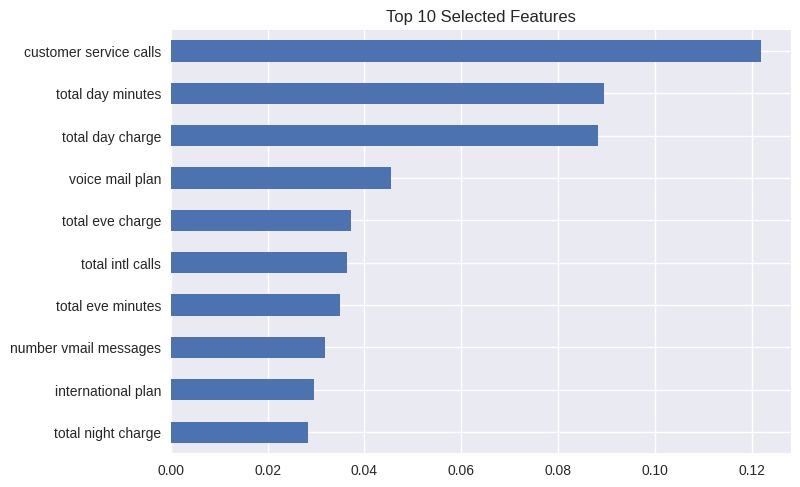

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
model_fe = ExtraTreesClassifier()
model_fe.fit(X_train_smote, y_train_smote)


feat_importances = pd.Series(model_fe.feature_importances_, index=X_train_smote.columns)
top_features = feat_importances.nlargest(10)  # Select the top 10 features

top_features_sorted = top_features.sort_values(ascending=True)  # Sort the values in descending order

top_features_sorted.plot(kind='barh')
plt.title("Top 10 Selected Features")
plt.show()

In [73]:
# Select the top 10 features
selected_features = top_features_sorted.index.tolist()

# Update the training and testing data with the selected features
X_train_selected = X_train_smote[selected_features]
X_test_selected = X_test[selected_features]

# Initialize the XGBoost model
xgboost = xgb.XGBClassifier()

# Train the XGBoost model using the updated training data

final_model = xgboost.fit(X_train_selected, y_train_smote)

# Make predictions on the training set
y_train_pred = xgboost.predict(X_train_selected)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
train_precision = precision_score(y_train_smote, y_train_pred)
train_recall = recall_score(y_train_smote, y_train_pred)
train_f1_score = f1_score(y_train_smote, y_train_pred)
train_roc_auc = roc_auc_score(y_train_smote, y_train_pred)

# Make predictions on the test set using the updated testing data
y_test_pred = xgboost.predict(X_test_selected)

print("confusion_matrix for XGBoost\n", confusion_matrix(y_test, y_test_pred))
print("*" * 49)

print(classification_report(y_test, y_test_pred))

print("Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred))

confusion_matrix for XGBoost
 [[552  14]
 [ 26  75]]
*************************************************
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       566
           1       0.84      0.74      0.79       101

    accuracy                           0.94       667
   macro avg       0.90      0.86      0.88       667
weighted avg       0.94      0.94      0.94       667

Test ROC AUC Score: 0.8589196375467936


#### Observations

We find out dropping the 'noise' columns improves our model as we have less False positives<br>
Features that were the most important in predicting churn were:
customer service calls, total day minutes, total day charge, voice mail plan, total eve charge, total int calls.

Compared to the previous results of the XGBoost model, the optimized version achieves slightly better performance in terms of precision, recall, and F1-score for churned customers. The model demonstrates a high accuracy and a reasonable balance between correctly identifying churned customers and minimizing false positives.


In [74]:
import pickle

pickle.dump(final_model, open("XGmodel.pkl", "wb"))

# 8.0 Conclusions

In this final section, we address the study’s objectives.<br>
<br>
### **8.1 Develop a predictive model using machine learning algorithms that classifies customers as churned or non-churned.**<br>
•	Gradient Boosting (XGBoost) model has been developed, tuned and trained. XGBoost is a powerful and popular machine learning algorithm which is known for its effectiveness<br>
<br>
### **8.2 Evaluate the performance of the predictive model using appropriate evaluation metrics.**<br>
The model underwent evaluation in comparison to three other models: Decision Tree, Random Forest, and K-Nearest Neighbors. During this evaluation, the F1 score and ROC area under the curve were measured and compared.<br>
<br>
Among the models tested, XG Boost achieved the highest F1 score of 0.84, indicating its accuracy in making future predictions.<br> Additionally, the model's ROC AUC score was 0.895, demonstrating its ability to effectively differentiate between positive and negative outcomes.<br>
<br>
### **8.3 Identify Key features or patterns in the data that are predictive of churn** <br>
<br>

### **8.3.1 States vs churn**<br>
<br>

### **8.3.2 Customer service calls vs churn**<br>

 There is a relationship between the number of customer service calls and customer churn which is visible in the univariate analysis though we need to consider that other various factors will affect customer churn.<br>
The increase in customer service calls can be as a result of :
1.	Customer Satisfaction rate: Customers facing issues or who are dissatisfied with the service are more likely to make customer service calls. High levels of dissatisfaction can lead to higher churn rates.<br>

2.	Customer Experience: Frequent calls to customer service may also reflect a poor overall customer experience, which can contribute to churn. Customers who consistently encounter difficulties or frustrations may be more inclined to switch to a competitor.<br>

3.	Issue Resolution: An effective and efficient issue resolution through customer service can lead to increased customer loyalty and retention. <br>
4.	Service Quality: The number of customer service calls can also be influenced by the quality of service. A high-quality offering will result in fewer service inquiries and, consequently, lower churn.<br>
5.	Proactive Engagement: Proactive customer service outreach can reduce churn rates. When companies identify potential issues early and reach out to customers, it can prevent problems from escalating and encourage customer loyalty.<br>
<br>
**8.3.4 Time of day vs churn**<br>
Three features were analyzed factoring different times of day a call was made: Total day minutes, Total Evening Minutes and Total night minutes.<br>
<br>
The analysis reveals a positive relationship between these features and churn feature. This implies that as these variables increase, the likelihood of churn (true/false) also increases, and conversely, as the values decrease, the likelihood of churn also decreases.<br>
However, the specific time of day does **not** directly influence if a customer will discontinue with the service from SyrialTel<br>
<br>
**8.3.5 Area code vs  churn**<br>
The area code, which is the first three digits of a phone number, is **not** directly related to the act of churning itself.<br>
The area code of a phone number is mainly used to identify the geographic region associated with that number, but it does not directly influence the reasons why customers might decide to churn.<br>
<br>
As per the analysis seen in the univariate analysis, we could only see the distribution of the areas with churn but not really attribute it to the specific area. <br>
<br>
What was observable was that area code 415 had a higher customer base unlike the other two area codes. <br>
SyrialTel should investigate what other factors could be affecting the company from acquiring more customers in area code 510 and 408.<br>
<br>
Below would be possible areas of research :<br>
1.	Availability of sufficient network masts : The lack of sufficient telecommunication cell towers or network masts can result in subpar network coverage, leading to an unreliable service experience.<br>
2.	Product Knowledge: There is a potential issue of inadequate product knowledge among individuals residing in the two specific area codes.<br>
<br>


# 9.0 Recommendations<br>
To manage customer churning effectively and proactively retain customers, SyrialTel should focus on implementing the following strategies:<br>

1. **Enhance Network Coverage:** SyrialTel should invest in expanding and improving network infrastructure to ensure comprehensive coverage. This will enable customers to have reliable service across all regions. This can significantly reduce dissatisfaction caused by poor connectivity.<br>

2. **Putting the Customer First with Personalized Experience:** By using customer data and analytics, the company can get to know each customer better. <br>This helps SyrialTel understand what each person likes and how they behave. With this knowledge, they can create special marketing messages, offers, and service suggestions that suit each customer's specific needs. <br>For example, they can even send birthday messages to show how much they appreciate and value their customers. The goal here, is to make each customer feel important and cared for, providing them with a better overall experience.

3. **Proactive Customer Support:** SyrialTel can implement proactive customer support strategies, such as predictive issue detection and resolution, to address potential problems before they escalate.<br> For example when fiber networks are down, a message to acknowledge downtime is sent to all customers. <br>
The customer service team should also promptly resolve customer complaints and inquiries to show responsiveness and commitment to customer satisfaction. A measurement system should be put in place.<br>

4. **Introduce Value-Added Services and Offers:** This can include loyalty programs, and exclusive offers to incentivize customer loyalty.<br> As an example, when a customer runs out of airtime, they are given the option to purchase now and pay for it later.
SyrialTel can provide perks like discounted plans, free upgrades, or access to premium content to reward long-term customers.<br>

5. **Regular Communication:** SyrialTel can maintain regular communication with customers through personalized emails, SMS, or in-app messages. <br>They can keep customers informed about new services, features, and upcoming promotions to keep them engaged and informed.<br>

6. **Customer Feedback and Surveys:** Actively seek feedback from customers to understand their pain points and areas for improvement. Conduct regular surveys to gauge customer satisfaction and identify opportunities for enhancing services.<br>

7. **Community Engagement:** SyriaTel should foster a sense of community among customers through forums, online communities, or social media platforms.<br>
This will encourage interaction among customers to build loyalty and brand advocacy.<br>

8. **Proactive Churn Prediction:** Utilize data analytics and the created model to predict potential churners. ,<br> This will help SyrialTel identify customers showing signs of dissatisfaction or reduced engagement and implement targeted retention efforts.
